### 230709 하은서 필수과제3

서베이 데이터 가지고 간단한 시각화 및 전처리
정규표현식을 가지고 한글만 남기고 모두 다 삭제해 주시고
만족도에 따른 분석도, 시계열에 따른 분석도 가능하다.
두 가지 컬럼을 가지고 텍스트를 분석해 보기
시각화 + 분석 내용을 요약


In [109]:
import re
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
survey = pd.read_csv('survey_설문지.csv')
survey

,datetime,comment,satisfaction
0,2019-03-11,역앞에 젊은이들이 모여있다(AA역),1
1,2019-02-25,운동할 수 있는 장소가 있는 것이 좋다,5
2,2019-02-18,육아 지원이 좋다,5
3,2019-04-09,어린이집에 바로 입원할 수 있다(대기아동 없음),4
4,2019-01-06,역앞 상가가 쓸쓸하다,2
...,...,...,...
81,2019-01-21,초등학교 운동장이 잔디밭이라서 아주 좋다,5
82,2019-04-30,홈페이지에서도 설문지를 투고할 수 있게 해 달라,2
83,2019-01-09,공원에 놀이기구가 너무 적다,1
84,2019-03-09,공원을 더 늘렸으면 좋겠다,2


In [3]:
# null값 확인
survey.isna().sum()

datetime        0
comment         2
satisfaction    0
dtype: int64

In [4]:
# 결측값 제거 후 전처리
survey.dropna(inplace=True)


In [5]:
survey.isna().sum() #결측치 제거 확인

datetime        0
comment         0
satisfaction    0
dtype: int64

In [6]:
survey['comment']

0            역앞에 젊은이들이 모여있다(AA역)
1          운동할 수 있는 장소가 있는 것이 좋다
2                      육아 지원이 좋다
3     어린이집에 바로 입원할 수 있다(대기아동 없음)
4                    역앞 상가가 쓸쓸하다
                 ...            
81        초등학교 운동장이 잔디밭이라서 아주 좋다
82    홈페이지에서도 설문지를 투고할 수 있게 해 달라
83               공원에 놀이기구가 너무 적다
84                공원을 더 늘렸으면 좋겠다
85             역앞에 주차장이 적다, 불편하다
Name: comment, Length: 84, dtype: object

In [7]:
# 전처리
survey['comment'] = survey['comment'].str.replace('[A-Za-z]',"")
survey['comment']

C:\Users\HAEUNSEO\AppData\Local\Temp\ipykernel_22504\187277434.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  survey['comment'] = survey['comment'].str.replace('[A-Za-z]',"")


0              역앞에 젊은이들이 모여있다(역)
1          운동할 수 있는 장소가 있는 것이 좋다
2                      육아 지원이 좋다
3     어린이집에 바로 입원할 수 있다(대기아동 없음)
4                    역앞 상가가 쓸쓸하다
                 ...            
81        초등학교 운동장이 잔디밭이라서 아주 좋다
82    홈페이지에서도 설문지를 투고할 수 있게 해 달라
83               공원에 놀이기구가 너무 적다
84                공원을 더 늘렸으면 좋겠다
85             역앞에 주차장이 적다, 불편하다
Name: comment, Length: 84, dtype: object

<Axes: >

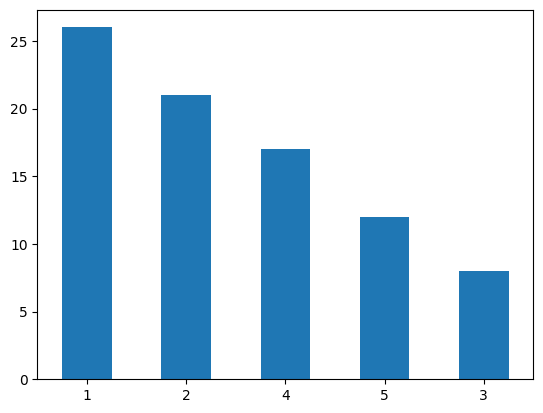

In [48]:
survey['satisfaction'].value_counts().plot(kind='bar', rot=0)

In [29]:
# 1, 2점이 가장 많음
# 왜그럴까?

s = survey.query('satisfaction==1 | satisfaction==2')
s

,datetime,comment,satisfaction
0,2019-03-11,역앞에 젊은이들이 모여있다(역),1
4,2019-01-06,역앞 상가가 쓸쓸하다,2
6,2019-02-02,놀 장소가 없다,2
10,2019-02-15,축제를 좀 더 성대하게 했으면 좋겠다,2
12,2019-03-06,공원이 더 필요하다,2
14,2019-01-03,슈퍼까지 가는게 힘들어,1
18,2019-03-15,밤길이 어둡다 (지구),1
20,2019-02-13,영화관이 아쉽다,2
22,2019-04-21,공원을 추가해 주었으면 한다,2
23,2019-01-01,관광 명소가 없다,1


In [30]:
# 키워드 별로 분리

from konlpy.tag import Okt
from konlpy.tag import Kkma
from konlpy.utils import pprint

In [31]:
okt = Okt()

In [32]:
# comment -> string으로 변환하기
s.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47 entries, 0 to 85
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   datetime      47 non-null     object
 1   comment       47 non-null     object
 2   satisfaction  47 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.5+ KB


In [33]:
s['comment'] = s['comment'].astype('string')

C:\Users\HAEUNSEO\AppData\Local\Temp\ipykernel_22504\782425824.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  s['comment'] = s['comment'].astype('string')


In [34]:
s.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47 entries, 0 to 85
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   datetime      47 non-null     object
 1   comment       47 non-null     string
 2   satisfaction  47 non-null     int64 
dtypes: int64(1), object(1), string(1)
memory usage: 1.5+ KB


In [35]:
s['comment']

0                                역앞에 젊은이들이 모여있다(역)
4                                      역앞 상가가 쓸쓸하다
6                                         놀 장소가 없다
10                            축제를 좀 더 성대하게 했으면 좋겠다
12                                      공원이 더 필요하다
14                                    슈퍼까지 가는게 힘들어
18                                    밤길이 어둡다 (지구)
20                                        영화관이 아쉽다
22                                 공원을 추가해 주었으면 한다
23                                       관광 명소가 없다
28                        의 교통 체증을 어떻게든 해 주었으면 한다.
29                          상가에 지붕이 없어서 비가 오면 큰일이다
30                                상가에 더 많은 카페를 원한다
32                              스포츠 센터의 이용 요금이 비싸다
33                             워킹맘의 지원을 더 늘렸으면 좋겠다
34                                     버스가 별로 안 온다
38                                   역앞에 주차장이 부족하다
39       이상한 아저씨가 말을 걸어온 적이 있다.경찰 순찰을 더 강화해 주길 바란다
42                            재난시의 피난 장소가 적은 것 같다.
44      에 신호등이 없는 사거리가 때문에 사고가 

In [85]:
# 'comment' tokenized 열에 저장

s['tokenized'] = s['comment'].apply(okt.nouns)

C:\Users\HAEUNSEO\AppData\Local\Temp\ipykernel_22504\2059643609.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  s['tokenized'] = s['comment'].apply(okt.nouns)


In [97]:
# list안에 있는 데이터 빈도수 구하기
from collections import Counter

In [110]:
# 평점 1점 분석
s1 = np.hstack(s[s['satisfaction']==1]['tokenized'].values)

In [114]:
s1_count = Counter(s1)
s1_count.most_common(15)

[('주차장', 5),
 ('역앞', 4),
 ('더', 3),
 ('역', 2),
 ('버스', 2),
 ('사고', 2),
 ('가로수', 2),
 ('도둑고양이', 2),
 ('젊은이', 1),
 ('슈퍼', 1),
 ('밤길', 1),
 ('지구', 1),
 ('관광', 1),
 ('명소', 1),
 ('별로', 1)]

In [115]:
from wordcloud import WordCloud

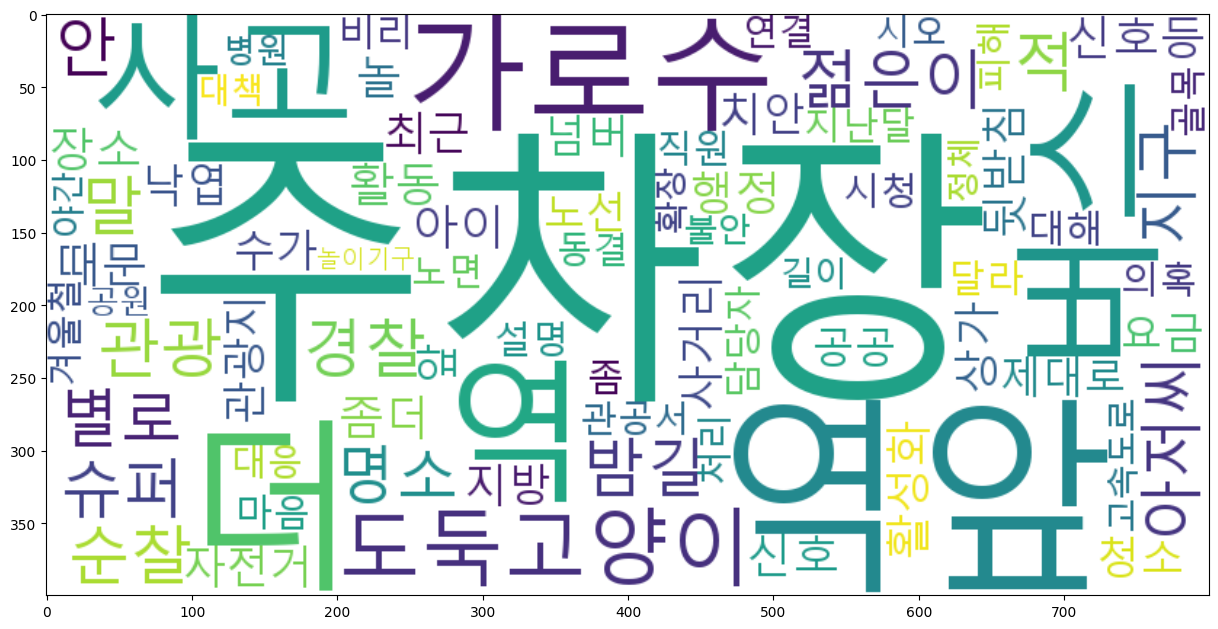

In [126]:
font = 'malgun'

plt.figure(figsize = (15,15))
temp_data = ' '.join(s1)
wc = WordCloud(width=800, height=400, font_path = font, background_color='white').generate(temp_data)


plt.imshow(wc, interpolation = 'bilinear')
plt.show()

### 1점 결과
- 1점을 준 이유는 '주차장', '역 앞', '가로수', '사고' 등의 키워드로 봤을 때 *주차장 문제*로 인한 불편이 많은 것을 알 수 있다.
- 실제로 주차장 키워드는 5번으로 가장 많이 나왔다.

In [128]:
# 평점 2점 분석
s2 = np.hstack(s[s['satisfaction']==2]['tokenized'].values)

In [129]:
s2_count = Counter(s2)
s2_count.most_common(15)

[('더', 7),
 ('상가', 3),
 ('공원', 3),
 ('지원', 3),
 ('시', 3),
 ('장소', 2),
 ('좀', 2),
 ('해', 2),
 ('피난', 2),
 ('시설', 2),
 ('역앞', 1),
 ('놀', 1),
 ('축제', 1),
 ('성대', 1),
 ('영화관', 1)]

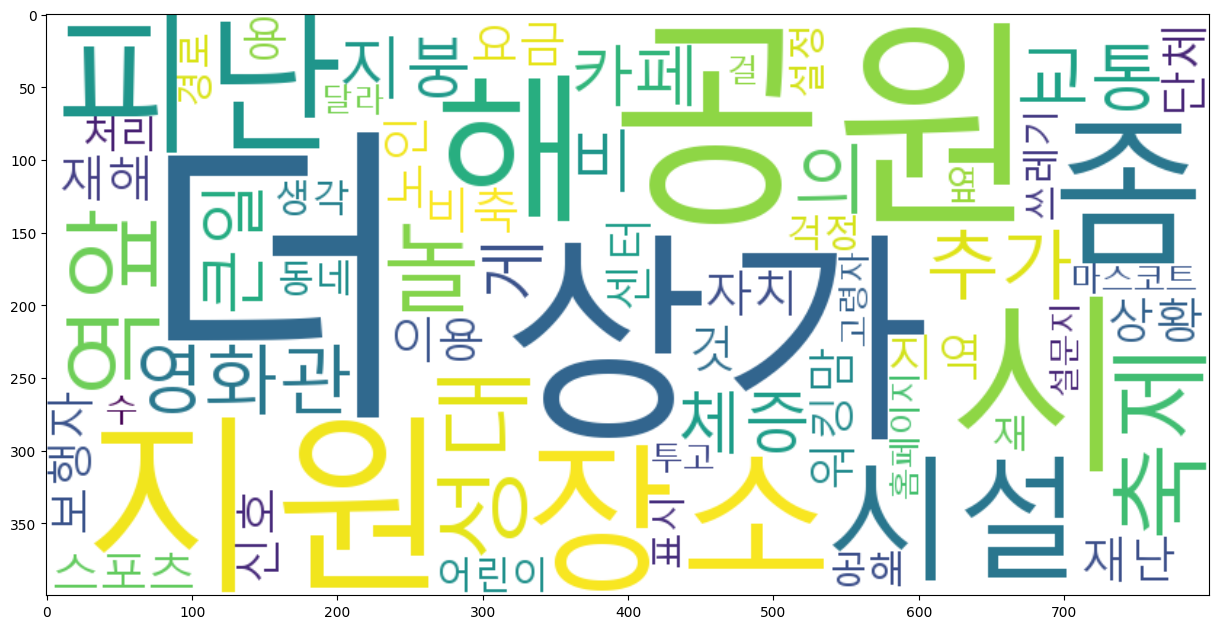

In [138]:
plt.figure(figsize = (15,15))
temp_data2 = ' '.join(s2)
wc = WordCloud(width=800, height=400, font_path = font, background_color='white').generate(temp_data2)


plt.imshow(wc, interpolation = 'bilinear')
plt.show()

### 2점 결과
- '더', '지원', '상가', '공원', '시설'라는 단어로 봤을 때 *문화생활에 필요한 장소*들을 원하는 것으로 보인다.
- '더'라는 단어가 가장 많이 나왔는데, 이는 기존제도에서 더 많은 지원(혜택)을 준다면 만족도가 높아질 수도 있을 것 같다.